In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
#%matplotlib inline
#mpl.rc('text', usetex = True)

In [2]:
#Some global and default parameters
SitesCount_XDefault = 400
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.2, pzNode1 = 0.63110, pzNode2 = -0.63110, \
                     EnergyNode1 = -0.0983, EnergyNode2 = 0.0983, VelocityXNode1 = 2.0, VelocityXNode2 = 2.0, \
                     VelocityZNode1 = 0.684, VelocityZNode2 = 0.684, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-3), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

### Let us first fix $p^y$ and vary $p^z$

In [4]:
pzMin = -1
pzMax = 1
pzCount = 30

### In absence of magnetic field

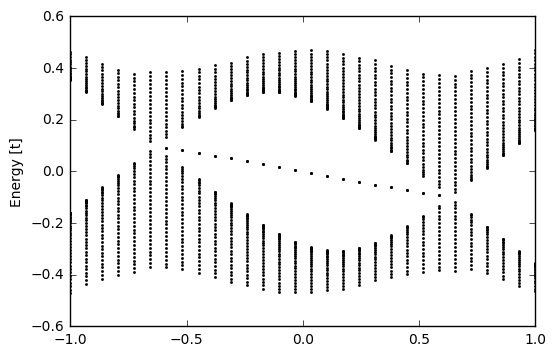

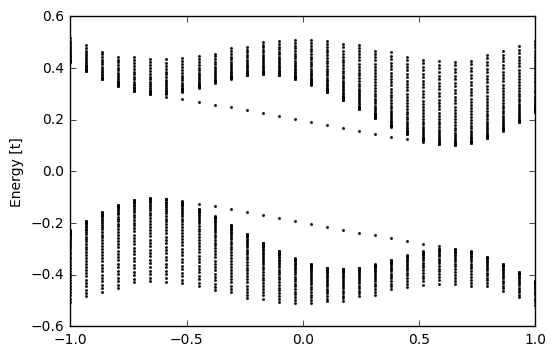

In [4]:
params = copy(ParametersDefault)

params.py = 0.
evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

params.py = 0.1
evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

### Fermi-arc states are doubly degenerate

In [10]:
params = copy(ParametersDefault)
params.py = 0.
params.pz = 0.
params.EigenvectorsCount = 6

evals, evecs = diagonalize_1D(fsys_1D,params)
print(evals)


del params, evals, evecs

[ -2.85460117e-01  -2.84193937e-01  -6.09544001e-18   8.63052691e-18
   2.84195108e-01   2.85461069e-01]


### Around the Weyl points, Fermi arcs "hybridize" with the bulk levels

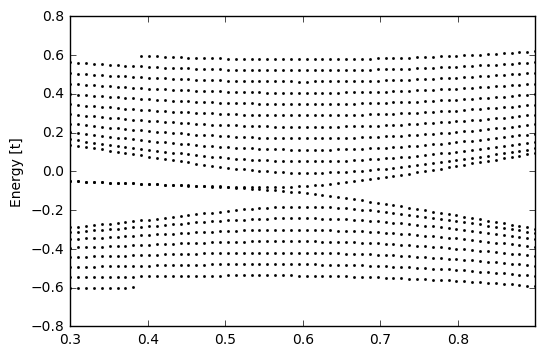

In [21]:
params = copy(ParametersDefault)
params.py = 0.
params.EigenvectorsCount = 20

fsys_1Dlocal = diagonalizer.FinalizedSystem_1D(100)

pzMin = 0.3
pzMax = 0.9
pzCount = 60

evals, evecs = pSweep_1D( fsys_1Dlocal, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, pzMin, pzMax, pzCount, evals, evecs

# In presence of magnetic field

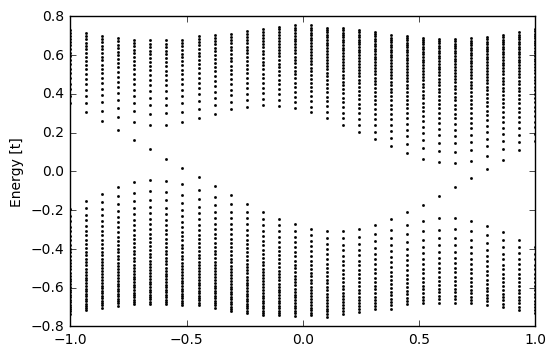

In [6]:
#lB = 20 lattice spacings
param = copy(ParametersDefault)
param.py = 0.
param.lBinv2 = 1./20.**2

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
diagonalizer.spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

### Now, let us fix $p^z$ and vary $p^y$ instead

#### While we vary $p^y$ over its whole Brillouin range, we observe the expected periodicity

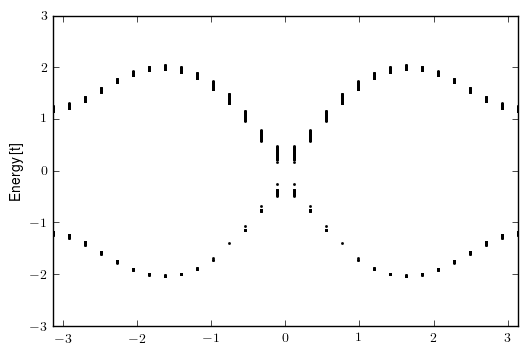

In [6]:
pyMin = -pi
pyMax = pi
pyCount = 30

param = copy(ParametersDefault)
param.pz = 0.3

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pMin=pyMin, pMax=pyMax, pCount=pyCount, yORzSweep = 'pySweep')
diagonalizer.spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

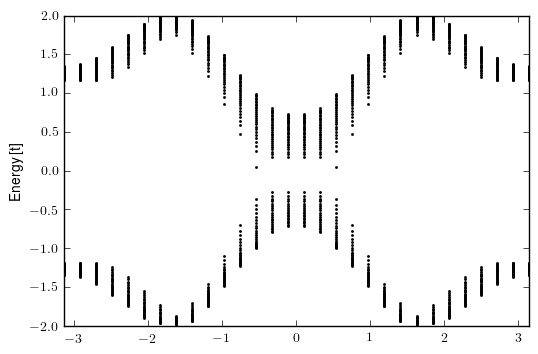

In [7]:
#lB = 20 lattice spacings
param = copy(ParametersDefault)
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pMin=pyMin, pMax=pyMax, pCount=pyCount, yORzSweep = 'pySweep')
diagonalizer.spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

### The states in absence of magnetic field are quite delocalized, except of the two "Fermi arc" states, which are tied to different surfaces of the slab

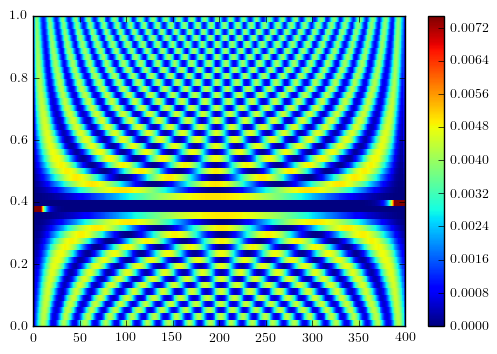

In [8]:
param = copy(ParametersDefault)
param.py = 0.1
param.pz = 0.3

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)

### While in presence of magnetic field they become localized. The lower-energy states (those who show some signs of degeneracy wrt $p^y$) are localized in the bulk

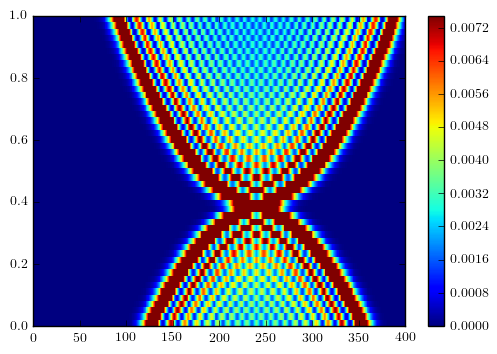

In [9]:
param = copy(ParametersDefault)
param.py = 0.1
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)

### At the same time,  the high-energy states are closer to the boundary

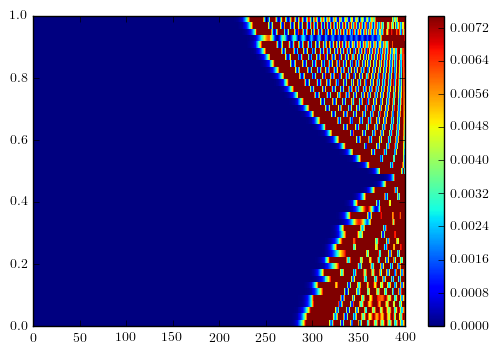

In [10]:
param = copy(ParametersDefault)
param.py = 1.
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)

## The Fermi arcs are not visible: maybe they have the same Fermi velocity along $y$ as the bulk states? 

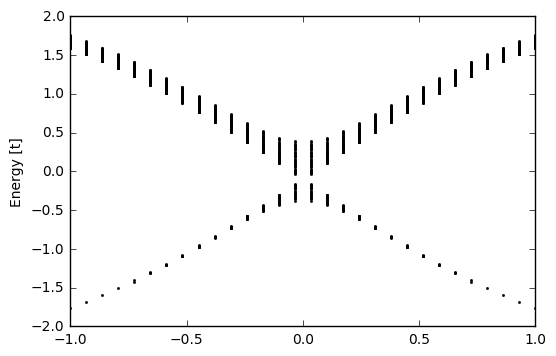

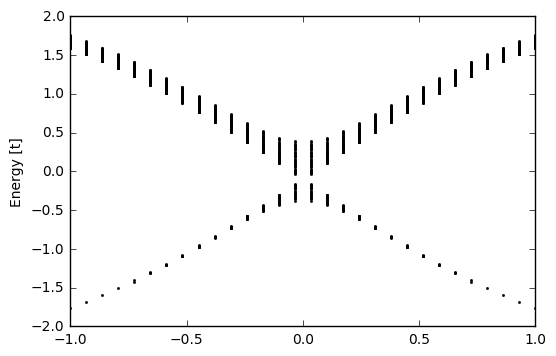

In [9]:
params = copy(ParametersDefault)

pyMin = -1.
pyMax = 1.
pyCount = 30

params.pz = params.pzNode1
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

params.py = params.pzNode1 + 0.1
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

del pyMin, pyMax, pyCount, params, evals, evecs